# Lecture 4 - Filters

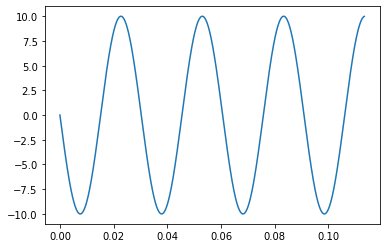

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import scipy as sp
import IPython

#Generating Signal
sampleRate = 44100 #hz 
nData = 5000 #Number of data samples 
time = np.arange(0,nData).T/sampleRate #Time array, so that the waves can been seen over time. From 1 to 2000 with each jump being equal to .T/samplingFreq
initPhase = np.pi/2
amplitude = 10
freq = 33
omega = 2 * np.pi * freq

sinusWave = amplitude * np.cos(omega * time + initPhase)

#Showing the wave
plt.plot(time,sinusWave)
plt.show()

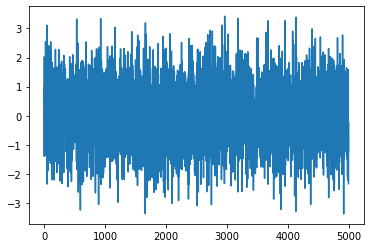

In [ ]:
#Generate white noise
wn = np.random.normal(loc=0,scale=1,size=nData)
plt.plot(wn)
plt.show()

In [ ]:
from scipy.io.wavfile import write

def writeFile(inputwf,name):
    name = str(name)
    scaled = np.int16(inputwf/np.max(np.abs(inputwf)) * 32767)
    write(name + ".wav", sampleRate, scaled)

writeFile(sinusWave,"realLonGGD")

# Low-Pass Filter (One-Zero Filter)

A low pass filter leaves low frequencies unaffected, and filters out high frequencies. Low pass filters are used everywhere that you need to smooth out the jitters from noisy real-world data, like the gyroscope or acceleration sensors in satellites, robots, and smartphones. It takes in a cutoff parameter, which controls how strongly it filters out high frequencies. Mathematically, a low pass filter can be expressed as output[i] = a * input[i] + (1 - a) * output[i - 1], where a is a number between 0 and 1. This type of low pass filter is sometimes also called a one-zero filter.

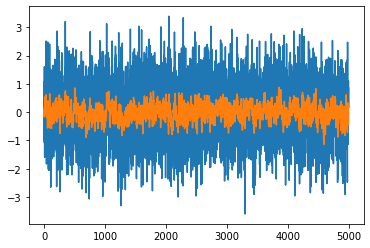

In [ ]:
#One-Zero (low pass filter)
def lowpass(x,a):
    y = np.zeros(len(x))
    for n in range(len(x)):
        #y[n] = x[n] + x[n -1]       # Simplest low-pass filter https://www.dsprelated.com/freebooks/filters/Simplest_Lowpass_Filter.html
        y[n] = a * x[n] + (1 - a) * y[n - 1]     #One-Zero filter (lowpass)
    return y

#Calling the lowpass with 0.10.w Only frequencies below 0.10 are kept
wn2 = lowpass(wn,0.15)

#Blue wave - Original
plt.plot(wn)
#Orange wave - New output
plt.plot(wn2)
plt.show()

# High-Pass Filter (One-Pole Filter)

A high pass filter leaves high frequencies unaffected, and filters out low frequencies. Filters are used to shape noise or other sounds, so that they become louder at some frequencies and softer at others. This gives the sound some added character. The cutoff parameter determines the frequency spectrum of the low pass filter.

Mathematically, a high pass filter can be expressed as output[i] = input[i] - a * output[i - 1], where a is a number between 0 and 1. This type of high pass filter is sometimes also called a one-pole filter.

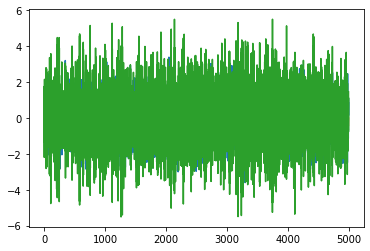

In [ ]:
#High-pass filter   (One-Pole Fitler)
def highpass(x,a):
    y = np.zeros(len(x))
    for n in range(len(x)):
        y[n] = x[n] - a * y[n-1]
    return y

wn3 = highpass(wn,0.80)

plt.plot(wn)
plt.plot(wn2)
plt.plot(wn3)
plt.show()

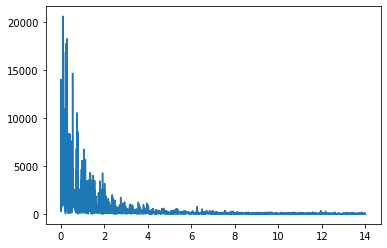

In [ ]:
def freqDomain(x):
    fourier_transform = np.fft.rfft(x)
    abs_fourier_transform = np.abs(fourier_transform)
    power_spectrum = np.square(abs_fourier_transform)
    frequency = np.linspace(0, 28/2, len(power_spectrum))
    plt.plot(frequency, power_spectrum)

#Frequency Domain for lowpass
freqDomain(wn2)

# Frequency Response

The frequency response varies with frequency. By choosing the coefficients of the difference equation, the shape of the frequency response vs frequency can be developed. High/low/band-pass filters are characterized by their frequency response that indicates how near-ideal their filter operation actually is. Their frequency response (mostly the magnitude part but the phase part as well) is measured and the cut-off frequencies are determined.

# Two-Point Average Filter/Moving Average Filter

The two-point average filter replaces every sample of the wave with the average of the sample and the one before it. 

Mathematically this can be expressed by: 
$$
 y[n] = 0.5 * (x[n] + x[n-1])
$$
Averaging smooths out the wave a little bit, which eliminates the highest frequencies, but doesn’t affect the low frequencies. The audio spectrum isn’t flat like for white noise, but instead goes down to zero at the high end. So a two-point average (also sometimes called a ‘one-zero filter’) is the simplest possible ‘low pass filter’. However, it doesn’t do as good a job of filtering out high frequencies as a standard low pass filter.

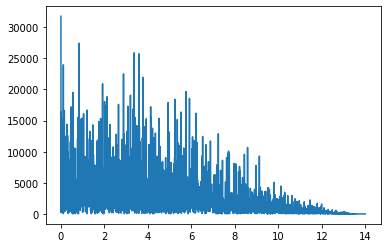

In [ ]:
def twoPointAverage(x):
    y = np.zeros(len(x))
    for n in range(len(x)):
        y[n] = 0.5 * (x[n] + x[n - 1])
    return y

tpa = twoPointAverage(wn)

freqDomain(tpa)

# Distortion (Cubic)

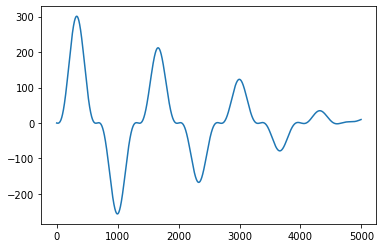

In [ ]:
#Distortion - Cubic https://www.hackaudio.com/digital-signal-processing/distortion-effects/soft-clipping/
def distortionCubic(x):
    cubicCoeff = 1/3
    y = np.zeros(len(sinusWave))
    for n in range(len(sinusWave)):
        y[n] = x[n] - cubicCoeff * ((x[n])**3)
        cubicCoeff -= 0.00006666666
    y = np.delete(y,[-1,-2,-3,0,1])
    return y

 
cDistorted = distortionCubic(sinusWave)


plt.plot(cDistorted)
#plt.plot(time,sinusWave)
plt.show()
writeFile(cDistorted,"hey")
IPython.display.Audio("hey.wav")

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7795dd5d-bbf3-4739-b229-8489999d5d0b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>